LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [24]:
data = pd.read_csv('datalab_export_2025-06-15 18_23_29.csv')
pd.DataFrame(data)
data.head()


,index,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [25]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  100 non-null    int64  
 1   trans_date_trans_time  100 non-null    object 
 2   merchant               100 non-null    object 
 3   category               100 non-null    object 
 4   amt                    100 non-null    float64
 5   city                   100 non-null    object 
 6   state                  100 non-null    object 
 7   lat                    100 non-null    float64
 8   long                   100 non-null    float64
 9   city_pop               100 non-null    int64  
 10  job                    100 non-null    object 
 11  dob                    100 non-null    object 
 12  trans_num              100 non-null    object 
 13  merch_lat              100 non-null    float64
 14  merch_long             100 non-null    float64
 15  is_frau

,index,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.0
mean,49.500000,93.008700,39.959892,-111.910546,8.784181e+04,39.940583,-111.917542,0.0
std,29.011492,127.058593,5.625294,14.538334,2.458889e+05,5.736598,14.553478,0.0
min,0.000000,1.420000,20.027100,-165.672300,4.600000e+01,19.209212,-166.148374,0.0
25%,24.750000,23.570000,38.529775,-121.206300,3.252500e+02,38.466763,-121.556805,0.0
50%,49.500000,65.265000,40.082600,-112.018800,1.220500e+03,40.178976,-111.988038,0.0
75%,74.250000,108.375000,42.318100,-99.384400,1.487100e+04,42.483754,-99.618245,0.0
max,99.000000,1055.470000,64.755600,-90.290700,1.312922e+06,65.023497,-89.589641,0.0


Fraud Detection

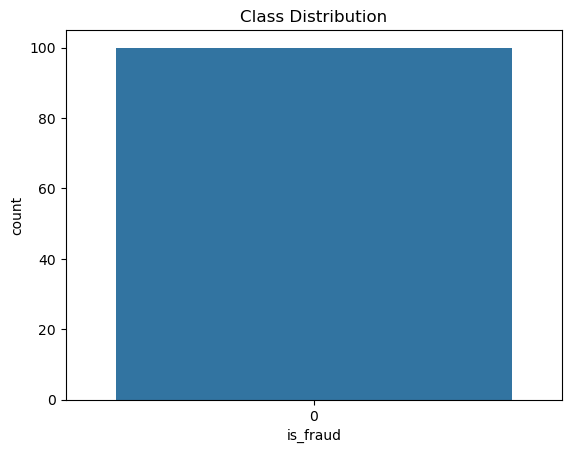

In [26]:
sns.countplot(x='is_fraud', data=data)
plt.title('Class Distribution')
plt.show()

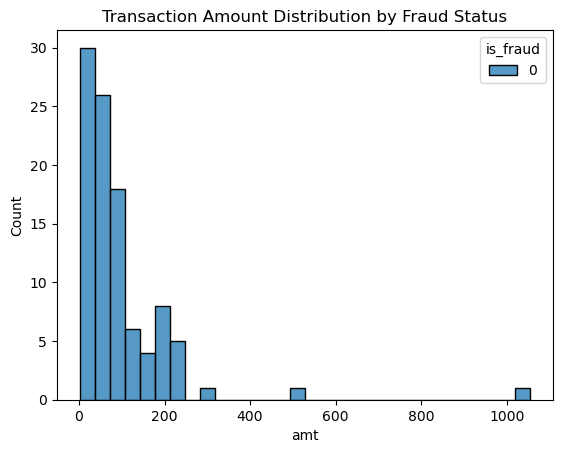

In [27]:
sns.histplot(data=data,x='amt',hue='is_fraud',multiple='stack',bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()

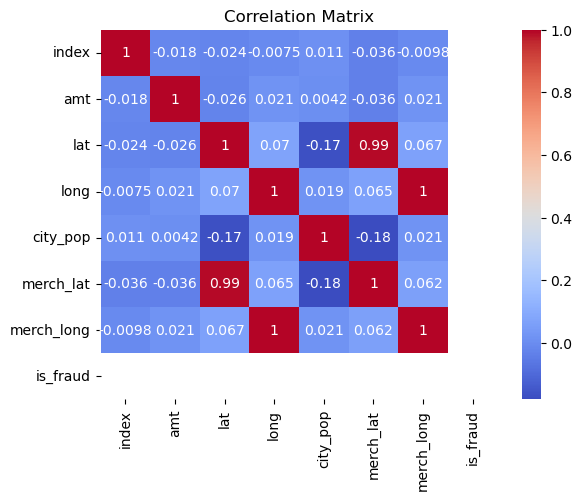

In [28]:
# Compute correlation matrix using only numeric columns
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

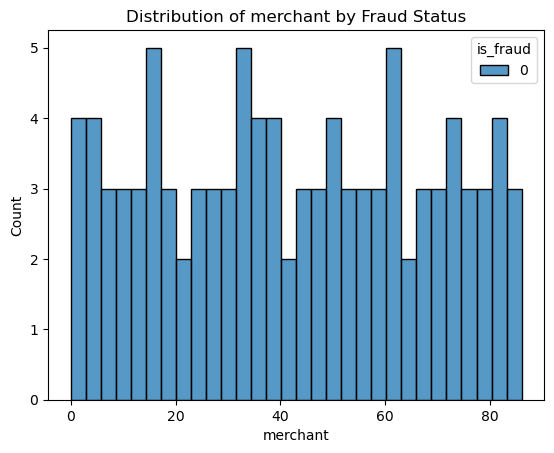

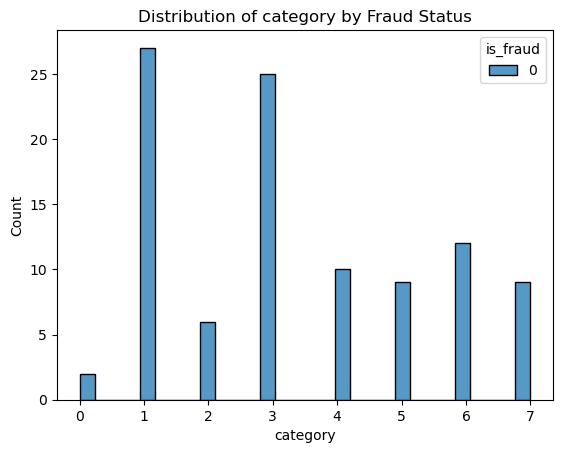

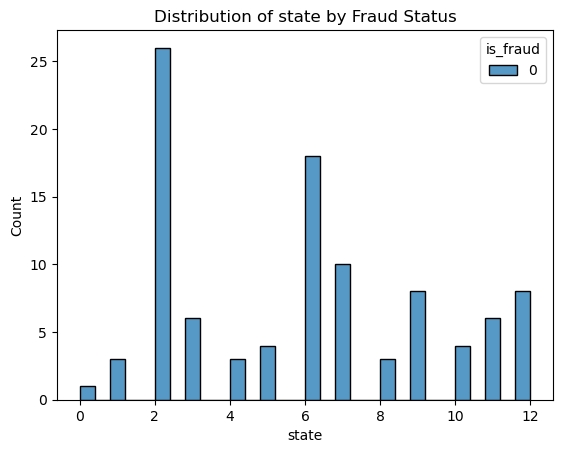

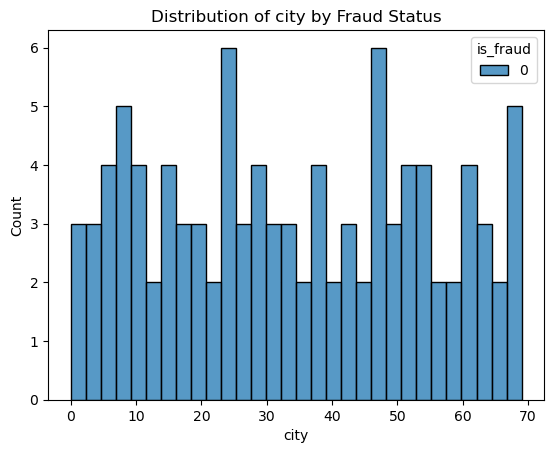

In [29]:
encoders = {}
for column in ['merchant', 'category', 'state', 'city']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    encoders[column] = le
    x= data.drop(['is_fraud','trans_num'], axis=1)
    y = data['is_fraud']
    sns.histplot(data=data, x=column, hue='is_fraud', multiple='stack', bins=30)
    plt.title(f'Distribution of {column} by Fraud Status')
    plt.show()
    


In [ ]:

print("Class distribution in y:", y.value_counts())


if y.nunique() < 2:
	print("Error: Only one class present in the target variable. Cannot train classifier.")
else:
	x_train, x_test, y_train, y_test = train_test_split(
		x, y, test_size=0.2, random_state=42, stratify=y
	)

	scaler = StandardScaler()
	scaler.fit(x_train.select_dtypes(include=[np.number]))
	x_train[x_train.select_dtypes(include=[np.number]).columns] = scaler.transform(x_train.select_dtypes(include=[np.number]))
	x_test[x_test.select_dtypes(include=[np.number]).columns] = scaler.transform(x_test.select_dtypes(include=[np.number]))
	y_train = y_train.astype('int')
	y_test = y_test.astype('int')

	print("Class distribution in y_train:", y_train.value_counts())
	print("Class distribution in y_test:", y_test.value_counts())

	if y_train.nunique() < 2:
		print("Error: Only one class present in y_train after splitting. Cannot train classifier.")
	else:
		logreg = LogisticRegression(max_iter=1000, random_state=42)
		logreg.fit(x_train.select_dtypes(include=[np.number]), y_train)
		y_pred = logreg.predict(x_test.select_dtypes(include=[np.number]))
		print("Accuracy:", accuracy_score(y_test, y_pred))
		print(classification_report(y_test, y_pred))

Class distribution in y: is_fraud
0    100
Name: count, dtype: int64
Error: Only one class present in the target variable. Cannot train classifier.
